## Ans - 3 Standard PCA on centered data

In [78]:
## Ans - 3 Standard PCA
import numpy as np

In [79]:
data = np.genfromtxt('Dataset3.csv', delimiter=',') # Loading Data
data

array([[ 0.143  ,  0.98493],
       [-0.30467,  0.98562],
       [ 0.46625, -0.84003],
       ...,
       [ 6.1062 , -5.9864 ],
       [-7.4094 , -5.5205 ],
       [-0.12948, -8.8036 ]])

In [80]:
import matplotlib.pyplot as plt

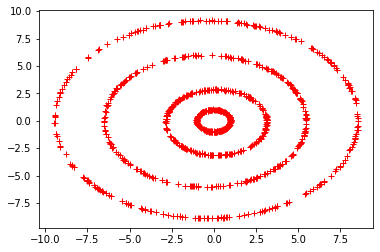

In [81]:
x,y = data[:,0],data[:,1]
plt.plot(x,y,'r+')

In [82]:
mean_of_data = np.mean(data,axis = 0) # Mean of data
mean_of_data

array([4.075e-07, 2.227e-07])

In [83]:
centered_data = data - mean_of_data #centering data
centered_data

array([[ 0.14299959,  0.98492978],
       [-0.30467041,  0.98561978],
       [ 0.46624959, -0.84003022],
       ...,
       [ 6.10619959, -5.98640022],
       [-7.40940041, -5.52050022],
       [-0.12948041, -8.80360022]])

In [84]:
var_ori = np.var(centered_data,axis=0)  #Variance of original data

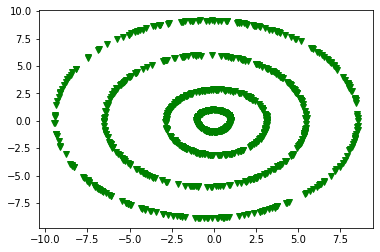

In [85]:
x_c,y_c = centered_data[:,0],centered_data[:,1]
plt.plot(x_c,y_c,'gv')

In [86]:
covariance = np.cov(centered_data,rowvar = False)  # covariance matrix of centered data
covariance

array([[14.7809367 ,  0.80966871],
       [ 0.80966871, 16.87223563]])

In [87]:
import scipy.linalg as la

In [88]:
eigen_values,eigen_vectors = la.eig(covariance) #eigen values and eigen vectors of covariance matrix


In [89]:
print('The eigen values are :',eigen_values)
print()
print('The eigen vectors of covariance matrix :',eigen_vectors)

The eigen values are : [14.50410886+0.j 17.14906347+0.j]

The eigen vectors of covariance matrix : [[-0.9462227 -0.323516 ]
 [ 0.323516  -0.9462227]]


In [90]:
eig_ind = []
for i in range(len(eigen_values)):
    eig_ind.append((i,eigen_values[i]))
eig_ind.sort(key = lambda x: x[1],reverse = True)
eigen_values = (eig_ind[0][1],eig_ind[1][1])
major_eve,minor_eve = eigen_vectors[:,eig_ind[0][0]],eigen_vectors[:,eig_ind[1][0]] # 1st and 2nd principle components

In [91]:
w_transpose = np.array([major_eve,minor_eve])
projection_scalars = w_transpose@np.transpose(centered_data)
projection_scalars  # Projections

array([[-0.97822557, -0.83405005,  0.64401646, ...,  3.68901448,
         7.62068223,  8.37205534],
       [ 0.18333109,  0.60714983, -0.71293917, ..., -7.71452094,
         5.22497267, -2.72558827]])

In [92]:
major_eve_new_data,minor_eve_new_data = [],[]
for i in range(len(centered_data)):
    major_eve_new_data.append(list(projection_scalars[0][i]*major_eve))
    minor_eve_new_data.append(list(projection_scalars[1][i]*minor_eve))
major_eve_new_data = np.array(major_eve_new_data) # Projected data on 1st principle component
minor_eve_new_data = np.array(minor_eve_new_data) # Projected data on 2nd principle component

In [93]:
major_var = np.var(major_eve_new_data) # variance of 1st principle component
minor_var = np.var(minor_eve_new_data) # variance of 2nd principle component

In [94]:
ori_var_mag = np.linalg.norm(var_ori)      # magnitude of original data variance
major_var_mag = np.linalg.norm(major_var)  # magnitude of 1st principle variance
minor_var_mag = np.linalg.norm(minor_var)  # magnitude of 2nd principle variance

In [95]:
percent_var_major = (abs(major_var_mag - ori_var_mag)/ori_var_mag)*100
percent_var_minor = (abs(minor_var_mag - ori_var_mag)/ori_var_mag)*100
print('variance explained by 1st principal component is:{}%'.format(percent_var_major))
print('variance explained by 2nd principal component is:{}%'.format(percent_var_minor))

variance explained by 1st principal component is:61.7736921249751%
variance explained by 2nd principal component is:67.66945718242042%


Text(0.5, 1.0, 'Projection scalars of two principle components')

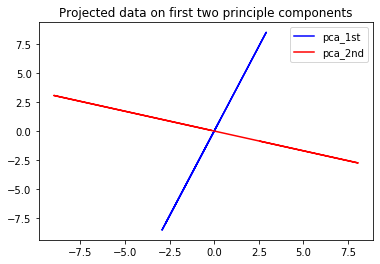

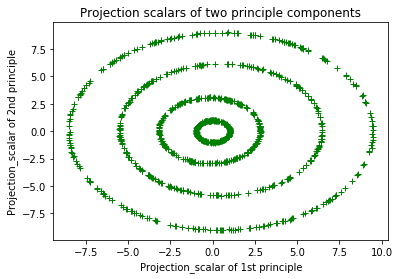

In [97]:
plt.figure(1)
pca_major = np.array(major_eve_new_data)
ma_x,ma_y = pca_major[:,0],pca_major[:,1]
plt.plot(ma_x,ma_y,'b')
plt.title('Projected data on first two principle components')

pca_minor = np.array(minor_eve_new_data)
mi_x,mi_y = pca_minor[:,0],pca_minor[:,1]
plt.plot(mi_x,mi_y,'r')

plt.legend(['pca_1st','pca_2nd'])

plt.figure(2)
plt.plot(projection_scalars[1],projection_scalars[0],'g+')
plt.xlabel('Projection_scalar of 1st principle')
plt.ylabel('Projection_scalar of 2nd principle')
plt.title('Projection scalars of two principle components')

## (ii) Without centering data

In [98]:
covariance = np.cov(data,rowvar = False) # covariance matrix of non centered data
covariance

array([[14.7809367 ,  0.80966871],
       [ 0.80966871, 16.87223563]])

In [99]:
eigen_values,eigen_vectors = la.eig(covariance) #eigen values and eigen vectors of covariance matrix
print(eigen_values)
print()
print(eigen_vectors)

[14.50410886+0.j 17.14906347+0.j]

[[-0.9462227 -0.323516 ]
 [ 0.323516  -0.9462227]]


In [100]:
eig_ind = []
for i in range(len(eigen_values)):
    eig_ind.append((i,eigen_values[i]))
eig_ind.sort(key = lambda x: x[1],reverse = True)
eigen_values = (eig_ind[0][1],eig_ind[1][1])
major_eve,minor_eve = eigen_vectors[:,eig_ind[0][0]],eigen_vectors[:,eig_ind[1][0]] # 1st and 2nd principle components

In [101]:
w_transpose = np.array([major_eve,minor_eve])
projection_scalars = w_transpose@np.transpose(data)
projection_scalars  # Projections

array([[-0.97822591, -0.83405039,  0.64401612, ...,  3.68901414,
         7.62068189,  8.372055  ],
       [ 0.18333077,  0.60714951, -0.71293948, ..., -7.71452125,
         5.22497236, -2.72558858]])

In [102]:
major_eve_new_data,minor_eve_new_data = [],[]
for i in range(len(data)):
    major_eve_new_data.append(list(projection_scalars[0][i]*major_eve))
    minor_eve_new_data.append(list(projection_scalars[1][i]*minor_eve))
major_eve_new_data = np.array(major_eve_new_data) # Projected data on 1st principle component
minor_eve_new_data = np.array(minor_eve_new_data) # Projected data on 2nd principle component

In [103]:
major_var = np.var(major_eve_new_data) # variance of 1st principle component
minor_var = np.var(minor_eve_new_data) # variance of 2nd principle component

In [104]:
ori_var_mag = np.linalg.norm(var_ori)      # magnitude of original data variance
major_var_mag = np.linalg.norm(major_var)  # magnitude of 1st principle variance
minor_var_mag = np.linalg.norm(minor_var)  # magnitude of 2nd principle variance

In [105]:
percent_var_major = (abs(major_var_mag - ori_var_mag)/ori_var_mag)*100
percent_var_minor = (abs(minor_var_mag - ori_var_mag)/ori_var_mag)*100
print('variance explained by 1st principal component is:{}%'.format(percent_var_major))
print('variance explained by 2nd principal component is:{}%'.format(percent_var_minor))

variance explained by 1st principal component is:61.77369212497506%
variance explained by 2nd principal component is:67.66945718242023%


Text(0.5, 1.0, 'Projection scalars of two principle components')

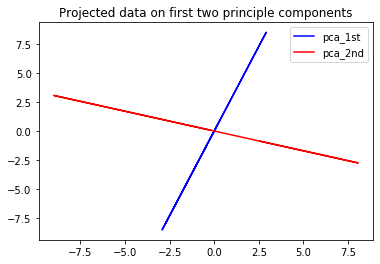

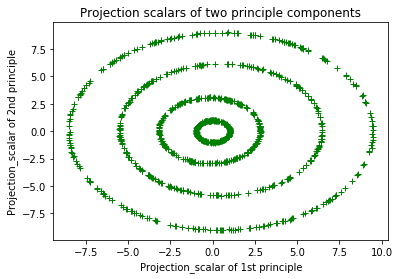

In [106]:
plt.figure(1)
pca_major = np.array(major_eve_new_data)
ma_x,ma_y = pca_major[:,0],pca_major[:,1]
plt.plot(ma_x,ma_y,'b')
plt.title('Projected data on first two principle components')

pca_minor = np.array(minor_eve_new_data)
mi_x,mi_y = pca_minor[:,0],pca_minor[:,1]
plt.plot(mi_x,mi_y,'r')

plt.legend(['pca_1st','pca_2nd'])

plt.figure(2)
plt.plot(projection_scalars[1],projection_scalars[0],'g+')
plt.xlabel('Projection_scalar of 1st principle')
plt.ylabel('Projection_scalar of 2nd principle')
plt.title('Projection scalars of two principle components')

## (iii) Kernel PCA

In [69]:
def kernal(x,y,type,p,sigma):  #Kernel Functions
    if type=='A':
        return (np.dot(x,y)+1)**p  #polynomial Kernel
    else:
        return np.exp(- ((1/ (2*sigma**2)) * (np.linalg.norm(x-y))))  #Gaussian Kernel

In [70]:
def kernal_mat(data,dim,type,p,sigma):  #Constructing Kernel Matrix
    kernal_matrix = [[0]*dim for i in range(dim)]
    transposed_data = np.transpose(data)
    for i in range(dim):
        for j in range(dim):
            kernal_matrix[i][j] = kernal(transposed_data[:,i],transposed_data[:,j],type,p,sigma)

    kernal_matrix = np.array(kernal_matrix)
    return kernal_matrix

In [71]:
def is_neg_eva(eigen_values): #Checking for -ve eigen values.
    ind = eigen_values>0
    return ind

In [72]:
import math
def scale_eigen_vectors(matrix,eigen_values):  #Scaling of Kernel Eigen Vectors to appropriate length
    scaled_vectors = []
    norms = np.linalg.norm(matrix,axis = 0)
    n = np.shape(matrix)[0]
    for i in range(len(norms)):
        scalar = (1/math.sqrt(eigen_values[i]))*(1/norms[i])
        scaled_vectors.append(scalar*matrix[:,i])
    matrix = np.transpose(np.array(scaled_vectors))
    return matrix 

In [73]:
def center_kernal(matrix):  # Centering The bumped data (higher dimensional data)
    r,c = np.shape(matrix)
    ones = np.ones((r,c))/c
    return (matrix - ones@matrix - matrix@ones + ones@matrix@ones)

In [74]:
# Kernal_PCA

def kernel_PCA(centered_data,r,type,p = 2,sigma = 0.1):

    kernal_matrix = kernal_mat(centered_data,r,type,p,sigma) # Kernal matrix
    kernal_matrix = center_kernal(kernal_matrix)             # Centering Kernel matrix
    eigen_values,vectors = np.linalg.eig(kernal_matrix)      # eigen values & eigen vectors of Kernel
    index = is_neg_eva(eigen_values)
    if not all(index):
        eigen_values = eigen_values[index]
        vectors = vectors[:,index]

    scaled_vectors = scale_eigen_vectors(vectors,eigen_values)  # Scaled eigen vectors of Kernel
    eig_ind = []
    for i in range(len(eigen_values)):
        eig_ind.append((i,eigen_values[i]))
    eig_ind.sort(key = lambda x: x[1],reverse = True)
    two_e_val = (eig_ind[0][1],eig_ind[1][1])               # Top two eigen values
    two_e_vec = [list(scaled_vectors[:,eig_ind[0][0]]),list(scaled_vectors[:,eig_ind[1][0]])] # Top two Eigen vectors

    sum1,sum2 = 0,0
    projection_scalars = []
    for i in range(r):
        for j in range(r):
            sum1+= kernal_matrix[i][j] * two_e_vec[0][j]
            sum2+= kernal_matrix[i][j] * two_e_vec[1][j]
        projection_scalars.append((sum1,sum2))              # Projection scalars
        sum1,sum2 = 0,0
    
    two_e_vec = np.array(two_e_vec)
    coor = np.array(projection_scalars)
    return coor    

In [75]:
r,c = np.shape(centered_data) #shape of data
r,c

(1000, 2)

## Polynomial Kernel PCA

C:\Users\pavan\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


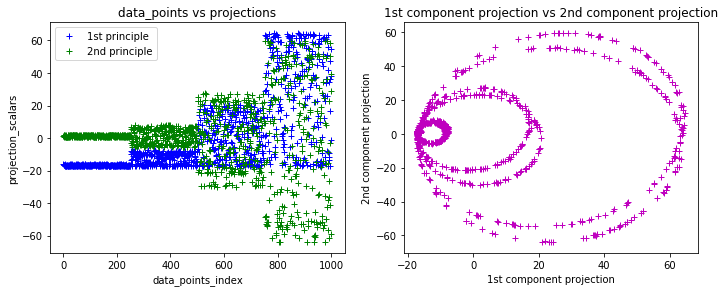

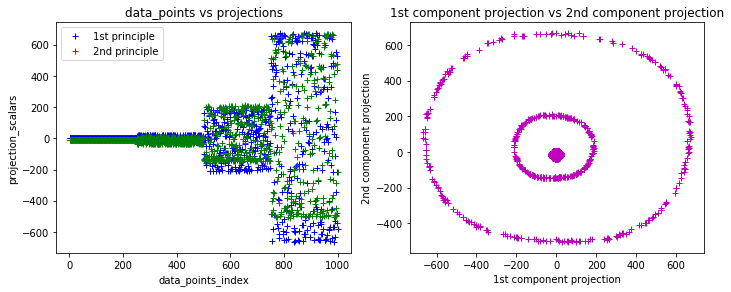

In [76]:
# Polynomial Kernel PCA.

x = np.arange(1,r+1)
for i in range(2,4):
    points = kernel_PCA(centered_data,r,'A',p = i)
    plt.figure()
    plt.subplot(1,2,1)
    plt.plot(x,points[:,0],'b+')
    plt.plot(x,points[:,1],'g+')
    plt.xlabel('data_points_index')
    plt.ylabel('projection_scalars')
    plt.title('data_points vs projections')
    plt.legend(['1st principle','2nd principle'])
    plt.subplots_adjust(left=0.5, bottom=0.1, right=3, top=0.9, wspace=0.2, hspace=0.2)
    plt.subplot(1,2,2)
    plt.plot(points[:,0],points[:,1],'m+')
    plt.xlabel('1st component projection')
    plt.ylabel('2nd component projection')
    plt.title('1st component projection vs 2nd component projection')
    plt.subplots_adjust(left=0.5, bottom=0.1, right=2, top=0.9, wspace=0.2, hspace=0.2)

plt.show()

## Gaussian Kernel PCA

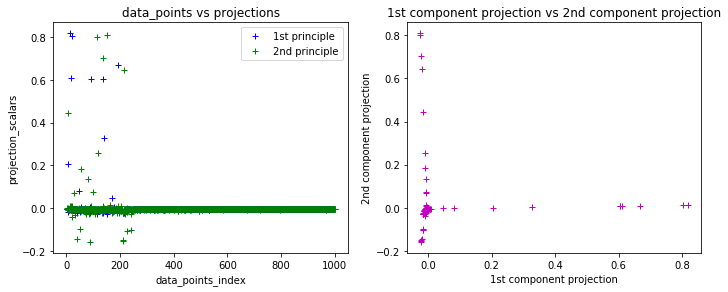

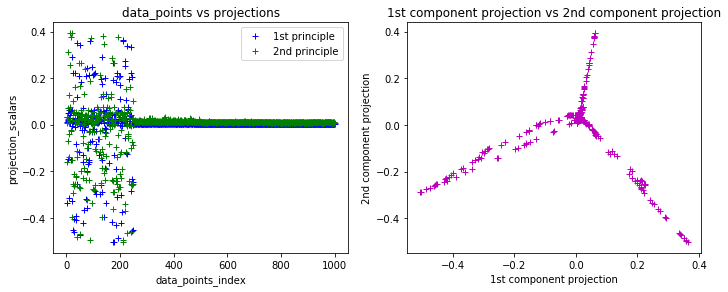

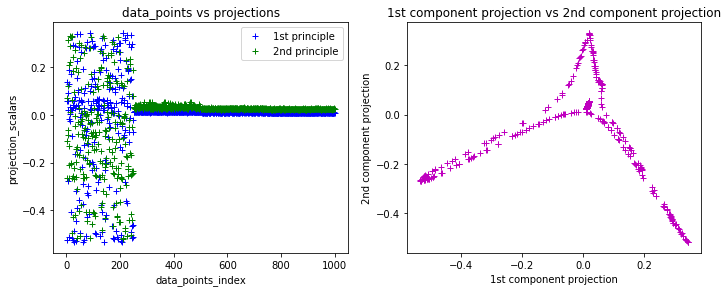

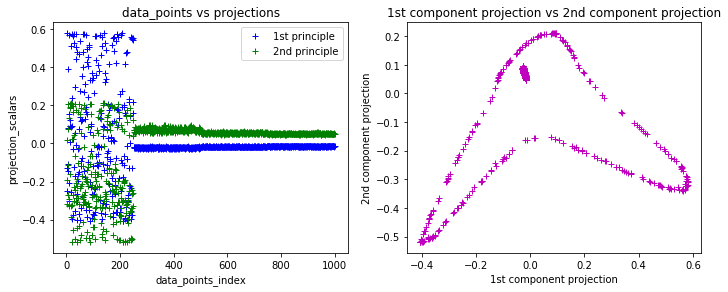

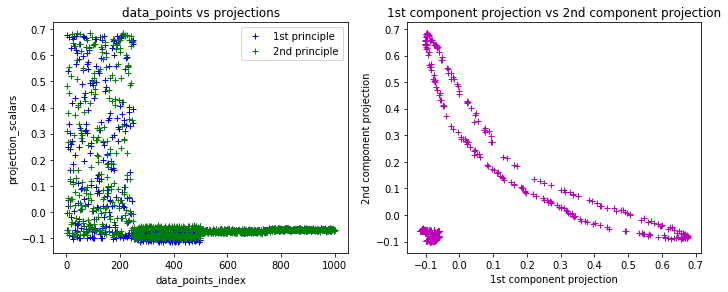

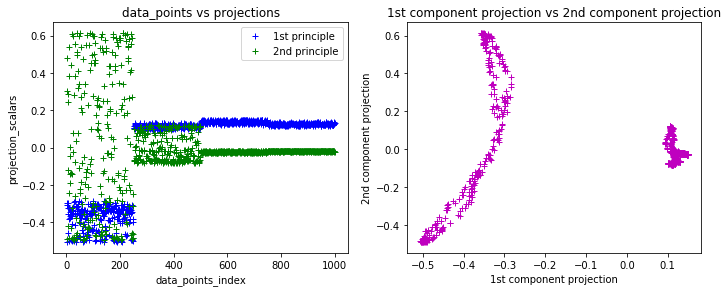

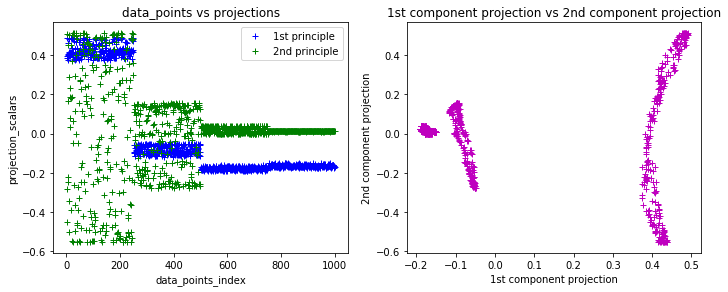

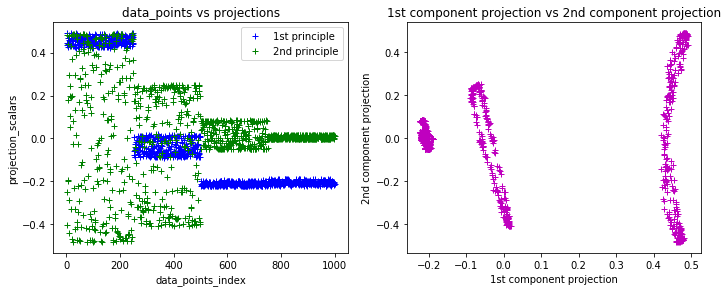

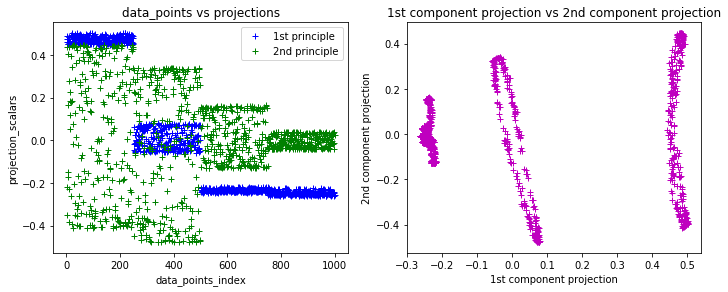

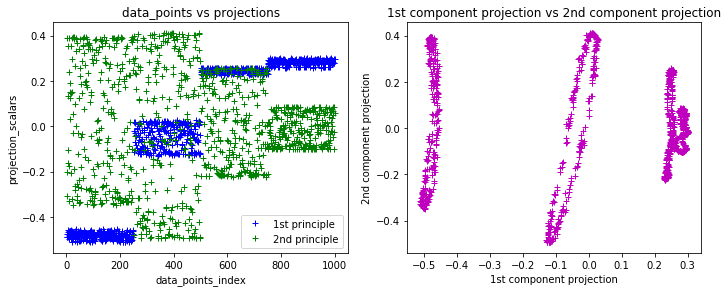

In [77]:
# Gaussian Kernel PCA.

for i in range(1,11):
    points = kernel_PCA(centered_data,r,'B',sigma = i*0.1)
    plt.figure()
    plt.subplot(1,2,1)
    plt.plot(x,points[:,0],'b+')
    plt.plot(x,points[:,1],'g+')
    plt.xlabel('data_points_index')
    plt.ylabel('projection_scalars')
    plt.title('data_points vs projections')
    plt.legend(['1st principle','2nd principle'])
    plt.subplots_adjust(left=0.5, bottom=0.1, right=3, top=0.9, wspace=0.2, hspace=0.2)
    plt.subplot(1,2,2)
    plt.plot(points[:,0],points[:,1],'m+')
    plt.xlabel('1st component projection')
    plt.ylabel('2nd component projection')
    plt.title('1st component projection vs 2nd component projection')
    plt.subplots_adjust(left=0.5, bottom=0.1, right=2, top=0.9, wspace=0.2, hspace=0.2)

plt.show()